# First TF Neural Network


### Build a Graph -> Initiate the Session -> Feed Data In and get Output.

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(10)
tf.set_random_seed(10)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [6]:
add_op = tf.add(a,b)
mul_op = tf.multiply(a,b)

In [9]:
with tf.Session() as sess:
    add_result,multiply_result = sess.run([add_op,mul_op],feed_dict={
        a : rand_a,
        b : rand_b
    })
    print(add_result)
    print('\n')
    print(multiply_result)

[[ 120.53346252   45.47659302  106.76622009  118.28178406   93.25209808]
 [  84.25636292   81.58298492  137.82977295   78.68778229   70.61067963]
 [ 119.84980774  146.65315247   51.70864868  102.53305054  132.57591248]
 [ 126.29232788  137.21524048   94.22732544  156.81713867  136.49729919]
 [ 114.3583374    74.32089996   97.43797302  127.51725769  104.28721619]]


[[ 3347.6394043     90.06635284  2750.12182617  3249.91333008
   2163.59008789]
 [ 1388.71948242  1223.5670166   4698.30761719  1044.7109375    545.73419189]
 [ 3516.84326172  4892.22558594    20.26006317  2628.25439453
   4169.86865234]
 [ 3983.85229492  4694.27636719  1898.35375977  5969.17724609
   4647.58105469]
 [ 3260.90307617   854.49737549  2243.92333984  4051.80566406
   2655.58959961]]


# Let's create a Neural Network

In [3]:
n_features = 10
n_dense_neurons = 3

In [4]:
x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal((n_features,n_dense_neurons)))
b = tf.Variable(tf.ones((n_dense_neurons)))

In [5]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [6]:
a = tf.sigmoid(z)

In [7]:
init = tf.global_variables_initializer()

In [8]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={
        x:np.random.random(size=(1,n_features))
    })

In [9]:
print(layer_out)

[[ 0.92650843  0.43520275  0.95488375]]


# Regression Example using Neural Network

In [10]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [11]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [13]:
y_label

array([  0.1276331 ,   0.03762125,   1.8422445 ,   3.85573418,
         4.26994397,   5.35759754,   7.0199676 ,   7.81719251,
         9.34008043,  10.30311686])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

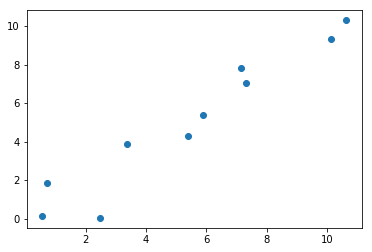

In [21]:
plt.plot(x_data,y_label,'o')

y = mx+b

In [22]:
np.random.rand(2)

array([ 0.8052232 ,  0.52164715])

In [23]:
m = tf.Variable(0.80)
b = tf.Variable(0.52)

In [24]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = tf.add(tf.multiply(m,x),b)
    error += (y-y_hat)**2

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    
    sess.run(init)
    training_steps = 10000
    for i in range(training_steps):
        sess.run(train)
        final_slope,final_intercept = sess.run([m,b])
        
    

In [46]:
final_slope

0.97958714

In [47]:
final_intercept

-0.26112035

In [48]:
x_test = np.linspace(-1,11,10)
# y = mx+b
y_pred_plot = x_test*final_slope + final_intercept

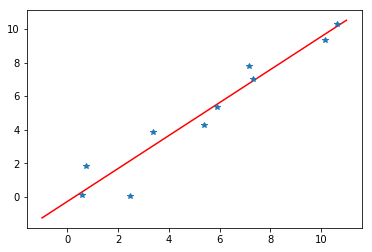

In [49]:
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')